# Entendimento dos Dados

**Integrantes:** Cristina Einsfeld, Heloysa Pelizon e Samuel Morales

## Etapa 3 - Trabalho Extensionista

Apresentação de uma análise estatística e do planejamento da integração e limpeza dos dados.

### Proposta
O seguinte trabalho consiste em realizar análises estatísticas iniciais a fim do conhecimento dos dados selecionados para a proposta de projeto extensionista da cadeira Coleta, Preparação e Análise de Dados - 2024/1. A proposta citada se faz em reconhecer as motivações por trás do comparecimento e da abstenção de voto no Brasil nas duas eleições presidenciais mais recentes (2022 e 2018), através de observação transversal dos dados de comparecimento e abstenção de voto fornecidos no site https://dadosabertos.tse.jus.br/group/comparecimento-e-abstencao do IBGE.


In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [7]:
# Funções auxiliares

def visualizacao_metadados_codigo(df):
    for c in df.columns:
        if c[0:2] == 'CD':
            # print(c)
            # display(df[c].value_counts().to_frame())
            print(c + '\n\n')
            print(df[c].value_counts())
            print('\n\n')

def visualizacao_metadados_descricao(df):
    for c in df.columns:
        if c[0:2] == 'DS':
            # print(c)
            # display(df[c].value_counts().to_frame())
            print(c + '\n\n')
            print(df[c].value_counts())
            print('\n\n')

def excluir_linhas_valores_nulos(df, colunas):
  """
  Exclui linhas de um DataFrame onde as colunas especificadas contenham 0, -3 ou -1.
  """

  # Cria uma máscara booleana para identificar linhas a serem excluídas
  mask = (df[colunas] != 0) & (df[colunas] != -3) & (df[colunas] != -1)

  # Aplica a máscara para filtrar o DataFrame
  df_filtrado = df[mask.all(axis=1)]

  return df_filtrado

import pandas as pd

def nova_coluna(df, lista_municipios_metro):

  # Cria uma nova coluna e inicializa com 'inter'
  df['REGIAO'] = 'inter'

  # Marca os municípios da lista como 'metro'
  df.loc[df['NM_MUNICIPIO'].isin(lista_municipios_metro), 'REGIAO'] = 'metro'

  return df

### Mudança de negócio

Durante a observação da quantidade de exemplares, o grupo chegou na conclusão de que diminuir o escopo dos dados seria uma opção mais viável para a as análises e manipulação do conjunto de dados. O conjunto original obtinha uma quantidade massiva de dados, tornando sua manipulação mais trabalhosa e resultados possivelmente menos expressivos quando de uma análise mais nichada. Sendo assim, a redução foi feita perante critério geográfico, privilegando o estado do Rio Grande do Sul. A preparação dos dados porsteriormente à essa decisão também incluem passos favoráveis para comparação de decorrências entre cidades de região metropolitana e fora da mesma.

In [8]:
# Determinando cidades da região metripolitana
regiao_metropolitana = [
    "ALVORADA", "ARARICÁ", "CACHOEIRINHA", "CAMPO BOM", "CANOAS", "CAPELA DE SANTANA", 
    "DOIS IRMÃOS", "ELDORADO DO SUL", "ESTÂNCIA VELHA", "ESTEIO", "GLORINHA", "GRAVATAÍ", 
    "GUAÍBA", "IVOTI", "NOVA HARTZ", "NOVA SANTA RITA", "PORTÃO", "SANTO ANTÔNIO DA PATRULHA", 
    "SÃO LEOPOLDO", "SAPIRANGA", "SAPUCAIA DO SUL", "TAQUARA", "TRIUNFO", "VIAMÃO", "PORTO ALEGRE"
]

### Análises Eleição 2018 - RS

In [9]:
# Carregamento do Dataframe com dados de Abstenção 2018
df_2018= pd.read_csv('./perfil_comparecimento_abstencao_2018_RS.csv', encoding='latin-1', sep= ';')

In [10]:
# Visualização 10 primeiros exemplares
df_2018.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_IDIOMA_INDIGENA,CD_GRUPO_INDIGENA,DS_GRUPO_INDIGENA,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,1,1,0,0,0,0,0
1,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,20,20,0,0,0,0,0
2,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,1,1,0,0,0,0,0
3,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,1,1,0,0,0,0,0
4,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,47,43,4,0,0,0,0
5,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,3,2,1,0,0,0,0
6,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,11,11,0,0,0,0,0
7,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,9,9,0,0,0,0,0
8,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,20,20,0,0,0,0,0
9,27/10/2024,16:30:22,2018,1,RS,84735,ÁUREA,3,2,MASCULINO,...,#NE,-3,#NE,3,3,0,0,0,0,0


In [11]:
# Lista de features presentes no DataFrame
print(df_2018.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'SG_UF',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_GENERO', 'DS_GENERO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA',
       'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE',
       'CD_COR_RACA', 'DS_COR_RACA', 'CD_QUILOMBOLA', 'DS_QUILOMBOLA',
       'CD_INTERPRETE_LIBRAS', 'DS_INTERPRETE_LIBRAS', 'CD_IDENTIDADE_GENERO',
       'DS_IDENTIDADE_GENERO', 'CD_IDIOMA_INDIGENA', 'DS_IDIOMA_INDIGENA',
       'CD_GRUPO_INDIGENA', 'DS_GRUPO_INDIGENA', 'QT_APTOS',
       'QT_COMPARECIMENTO', 'QT_ABSTENCAO', 'QT_COMPARECIMENTO_DEFICIENCIA',
       'QT_ABSTENCAO_DEFICIENCIA', 'QT_COMPARECIMENTO_TTE',
       'QT_ABSTENCAO_TTE'],
      dtype='object')


In [12]:
# Visualização de frequência de categorias em cada feature socio-cultural
visualizacao_metadados_codigo(df_2018)
visualizacao_metadados_descricao(df_2018)

CD_MUNICIPIO


CD_MUNICIPIO
88013    23402
85995     6168
87912     6164
88412     4660
87718     4458
         ...  
88048      600
89184      588
85820      582
89168      566
86525      556
Name: count, Length: 497, dtype: int64



CD_GENERO


CD_GENERO
4    337624
2    299298
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    203616
3    189020
5     84424
9     82428
7     72928
0      4506
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
 5559    55752
 5054    54582
 6064    54344
 6569    50414
 4549    50030
 4044    47054
 7074    44028
 3539    43042
 3034    36260
 7579    36146
 2529    29928
 8084    28270
 2124    21960
 8589    20014
 9094    12534
 2000    12286
 1900    11084
 1800     9904
 1700     6900
 9599     6466
 1600     4088
 9999     1794
-3          42
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    122910
6     93230
4     88232
5     74768
8     71188
2     69154
1     58770
7     56396
0      

In [13]:
# Filtragem de Dados do Dataframe com retirada de exemplares com valores inválidos

df_2018_nv= df_2018.drop(columns=[
    'ANO_ELEICAO', 'SG_UF' ,'CD_COR_RACA', 'DS_COR_RACA', 'CD_QUILOMBOLA', 'DS_QUILOMBOLA',
    'CD_INTERPRETE_LIBRAS', 'DS_INTERPRETE_LIBRAS', 'CD_IDENTIDADE_GENERO',
    'DS_IDENTIDADE_GENERO', 'CD_IDIOMA_INDIGENA', 'DS_IDIOMA_INDIGENA',
    'CD_GRUPO_INDIGENA', 'DS_GRUPO_INDIGENA', 'QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
    'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE',
    'DT_GERACAO', 'HH_GERACAO'])

colunas_codigo = [coluna for coluna in df_2018_nv.columns if coluna[0:2] == 'CD']
print(colunas_codigo)

df_2018_nv= excluir_linhas_valores_nulos(df_2018_nv, colunas_codigo)
display(df_2018_nv)

df_2018_nv = nova_coluna(df_2018_nv, regiao_metropolitana)
display(df_2018_nv)

df_2018_nv.to_csv("df_2018.csv")

['CD_MUNICIPIO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE']


,NR_TURNO,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO
0,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,1800,18 anos,7,SUPERIOR INCOMPLETO,1,1,0
1,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,1900,19 anos,5,ENSINO MÉDIO INCOMPLETO,20,20,0
2,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,1900,19 anos,6,ENSINO MÉDIO COMPLETO,1,1,0
3,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,2000,20 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0
4,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,2124,21 a 24 anos,6,ENSINO MÉDIO COMPLETO,47,43,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636917,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,1800,18 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0
636918,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,3539,35 a 39 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,7,7,0
636919,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,3539,35 a 39 anos,6,ENSINO MÉDIO COMPLETO,10,9,1
636920,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,2,2,0


,NR_TURNO,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,REGIAO
0,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,1800,18 anos,7,SUPERIOR INCOMPLETO,1,1,0,inter
1,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,1900,19 anos,5,ENSINO MÉDIO INCOMPLETO,20,20,0,inter
2,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,1900,19 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,inter
3,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,2000,20 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,inter
4,1,84735,ÁUREA,3,2,MASCULINO,1,SOLTEIRO,2124,21 a 24 anos,6,ENSINO MÉDIO COMPLETO,47,43,4,inter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636917,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,1800,18 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,inter
636918,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,3539,35 a 39 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,7,7,0,inter
636919,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,3539,35 a 39 anos,6,ENSINO MÉDIO COMPLETO,10,9,1,inter
636920,2,87300,NOVO TIRADENTES,64,4,FEMININO,3,CASADO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,2,2,0,inter


In [14]:
# Visualização de frequência de categorias em cada feature socio-cultural Dataframe RS
visualizacao_metadados_codigo(df_2018_nv)
visualizacao_metadados_descricao(df_2018_nv)

CD_MUNICIPIO


CD_MUNICIPIO
88013    21640
85995     6168
87912     6158
88412     4392
88773     4304
         ...  
88048      600
89184      588
85820      582
89168      566
86525      556
Name: count, Length: 497, dtype: int64



CD_GENERO


CD_GENERO
4    334014
2    296280
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    203038
3    187786
5     84264
9     82376
7     72830
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
5559    54832
5054    53744
6064    53398
4549    50030
6569    49602
4044    47054
7074    43244
3539    43042
3034    36260
7579    35422
2529    29928
8084    27698
2124    21960
8589    19586
2000    12286
9094    12188
1900    11084
1800     9904
1700     6900
9599     6268
1600     4088
9999     1776
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    121686
6     92754
4     87584
5     74432
8     70898
2     68382
1     58370
7     56188
Name: count, dtype: int64



DS_GENERO


DS_GENERO
FEMIN

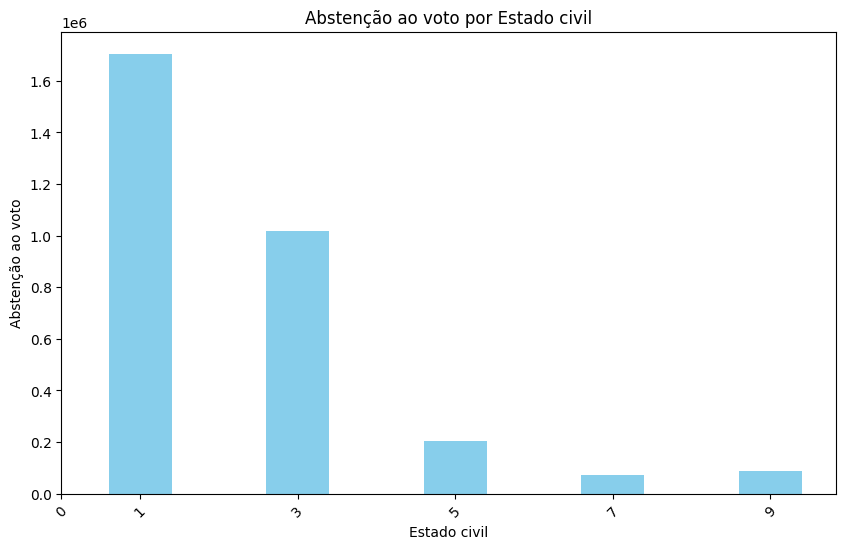

In [18]:
df_2018_agrupado = df_2018_nv.groupby('CD_ESTADO_CIVIL')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_ESTADO_CIVIL'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por Estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)

# Exibindo o gráfico
plt.show()

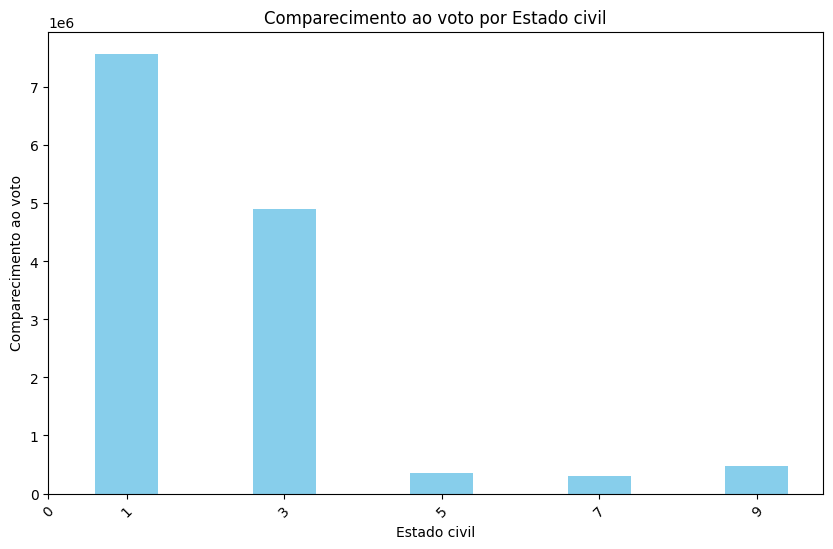

In [28]:
df_2018_agrupado = df_2018_nv.groupby('CD_ESTADO_CIVIL')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_ESTADO_CIVIL'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por Estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)

# Exibindo o gráfico
plt.show()

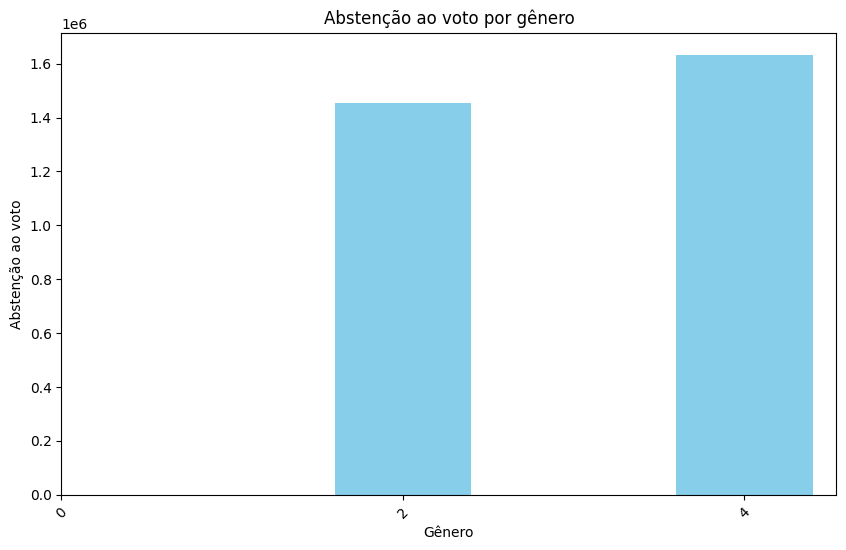

In [29]:
df_2018_agrupado = df_2018_nv.groupby('CD_GENERO')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GENERO'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)

# Exibindo o gráfico
plt.show()

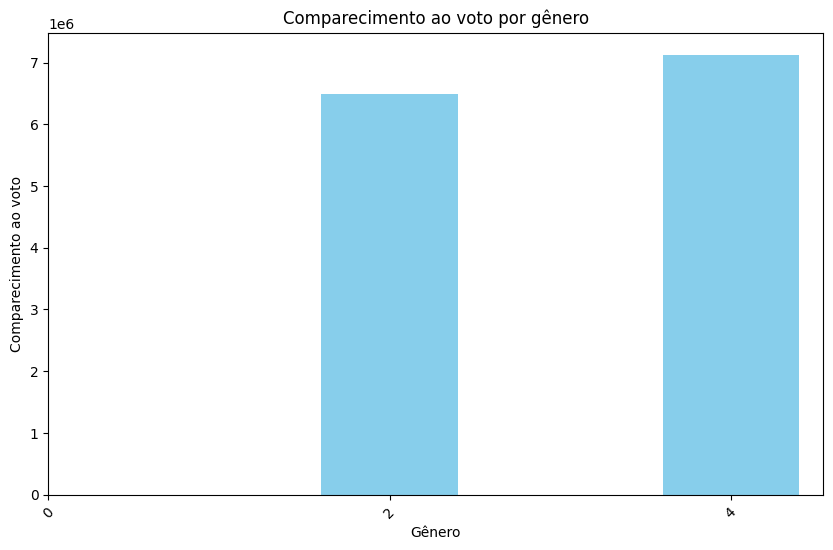

In [30]:
df_2018_agrupado = df_2018_nv.groupby('CD_GENERO')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GENERO'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)

# Exibindo o gráfico
plt.show()

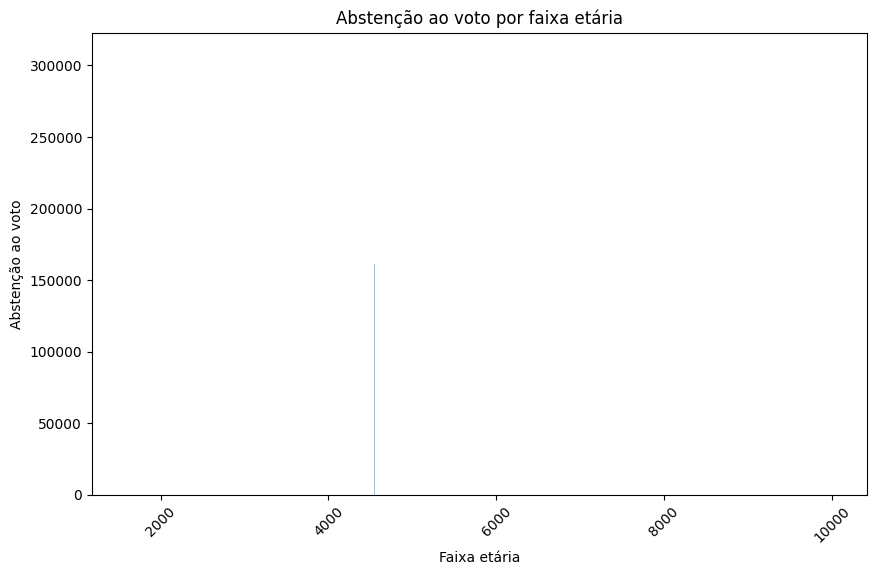

In [31]:
df_2018_agrupado = df_2018_nv.groupby('CD_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_FAIXA_ETARIA'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

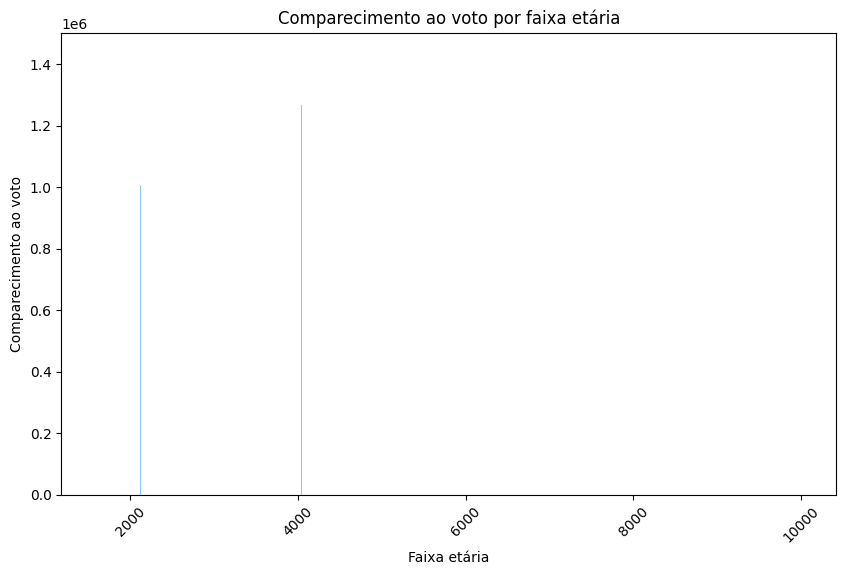

In [32]:
df_2018_agrupado = df_2018_nv.groupby('CD_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_FAIXA_ETARIA'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

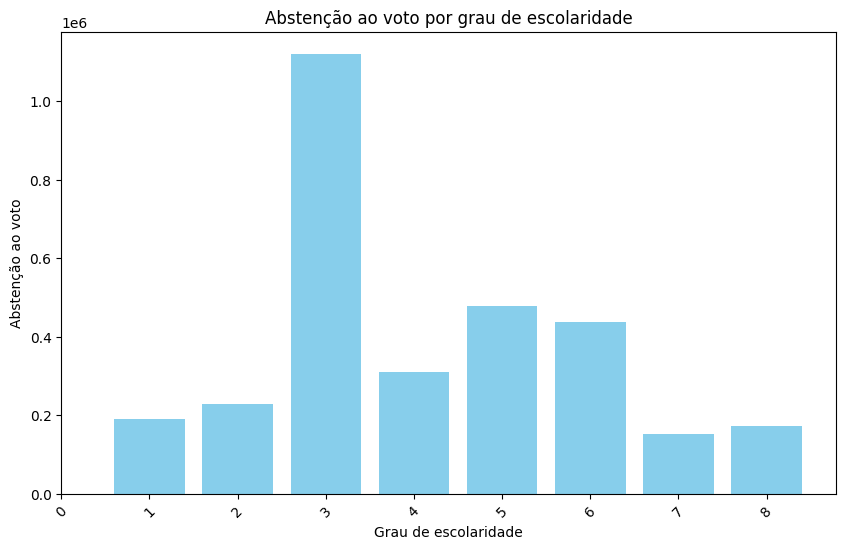

In [33]:
df_2018_agrupado = df_2018_nv.groupby('CD_GRAU_ESCOLARIDADE')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GRAU_ESCOLARIDADE'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)

# Exibindo o gráfico
plt.show()

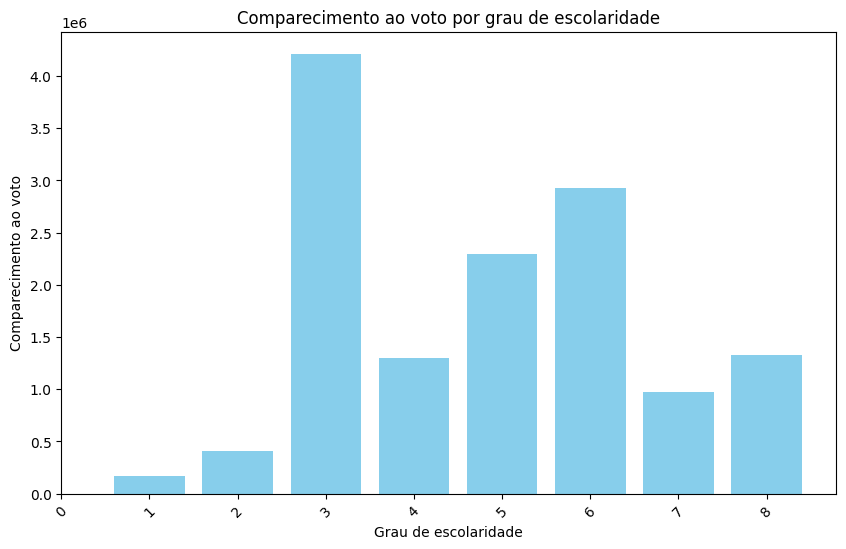

In [34]:
df_2018_agrupado = df_2018_nv.groupby('CD_GRAU_ESCOLARIDADE')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GRAU_ESCOLARIDADE'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)

# Exibindo o gráfico
plt.show()

### Análises Eleição 2022

In [15]:
# Carregamento do Dataframe com dados de Abstenção 2022
df_2022= pd.read_csv('./perfil_comparecimento_abstencao_2022.csv', encoding='latin-1', sep= ';')

In [16]:
# Visualização 10 primeiros exemplares
df_2022.head(10)# Lista de features presentes no DataFrame

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,85 a 89 anos,8,SUPERIOR COMPLETO,32,16,16,0,0,0,0
1,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,95 a 99 anos,1,ANALFABETO,9,0,9,0,0,0,0
2,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,35 a 39 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,1,0,0,0,0
3,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,35 a 39 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0,0,0,0
4,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,55 a 59 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0
5,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,80 a 84 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,16,10,6,0,0,0,0
6,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,3,1,2,0,0,0,0
7,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,28,21,7,0,1,0,0
8,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,80 a 84 anos,1,ANALFABETO,1,0,1,0,0,0,0
9,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,80 a 84 anos,2,LÊ E ESCREVE,4,2,2,0,0,0,0


In [17]:
# Lista de features presentes no DataFrame
print(df_2022.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'SG_UF',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_GENERO', 'DS_GENERO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA',
       'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE',
       'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCAO',
       'QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
       'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE'],
      dtype='object')


In [18]:
# Visualização de frequência de categorias em cada feature socio-cultural
visualizacao_metadados_codigo(df_2022)
visualizacao_metadados_descricao(df_2022)

CD_MUNICIPIO


CD_MUNICIPIO
71072    143084
60011    127190
41238     43652
13897     41852
97012     40844
          ...  
99350         2
99384         2
99198         2
99252         2
99147         2
Name: count, Length: 5751, dtype: int64



CD_GENERO


CD_GENERO
4    4625042
2    4119324
0      41372
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    2922052
3    2515178
9    1316074
5    1153352
7     815560
0      63522
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
 5559    723716
 6064    714682
 5054    688460
 6569    677722
 4549    652644
 4044    613980
 7074    607708
 3539    548186
 7579    513938
 3034    472454
 8084    418314
 2529    395884
 8589    317434
 2124    286172
 9094    226882
 2000    168796
 1900    160942
 9599    151254
 1800    148314
 1700    114236
 9999     90654
 1600     89498
-3         3868
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    1476472
6    1290434
2    1185466
4    108

In [19]:
# Redução do Dataframe para apenas cidades do estado do RS
df_2022_nv= df_2022[df_2022['SG_UF'] == 'RS' ]
df_2022_nv.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
92,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,2,MASCULINO,...,80 a 84 anos,8,SUPERIOR COMPLETO,1,1,0,0,0,0,0
93,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,17 anos,5,ENSINO MÉDIO INCOMPLETO,30,22,8,0,0,0,0
94,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,18 anos,6,ENSINO MÉDIO COMPLETO,51,47,4,0,0,0,0
95,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,35 a 39 anos,7,SUPERIOR INCOMPLETO,57,47,10,0,0,0,0
96,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,35 a 39 anos,8,SUPERIOR COMPLETO,245,222,23,1,0,7,0
97,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,85 a 89 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,5,2,3,0,0,0,0
98,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,85 a 89 anos,8,SUPERIOR COMPLETO,1,1,0,0,0,0,0
99,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,65 a 69 anos,4,ENSINO FUNDAMENTAL COMPLETO,46,46,0,0,0,0,0
100,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,65 a 69 anos,6,ENSINO MÉDIO COMPLETO,79,78,1,0,0,0,0
101,09/11/2022,15:22:04,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,...,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,38,33,5,0,0,0,0


In [20]:
# Redução de Dimensionalidade do Dataframe com exclusão de colunas desnecessárias
# Filtragem de Dados do Dataframe com retirada de exemplares com valores inválidos

df_2022_nv= df_2022_nv.drop(columns=[
    'ANO_ELEICAO', 'SG_UF', 'QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
    'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE',
    'DT_GERACAO', 'HH_GERACAO'])

colunas_codigo = [coluna for coluna in df_2022_nv.columns if coluna[0:2] == 'CD']
print(colunas_codigo)

df_2022_nv= excluir_linhas_valores_nulos(df_2022_nv, colunas_codigo)
display(df_2022_nv)

# Visualização dos 10 primeiros exemplares do no Dataframe
df_2022_nv.head(10)

df_2022_nv = nova_coluna(df_2022_nv, regiao_metropolitana)
display(df_2022_nv)

df_2022_nv.to_csv("df_2022_nv.csv")

['CD_MUNICIPIO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE']


,NR_TURNO,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO
92,1,89591,VERANÓPOLIS,88,2,MASCULINO,9,DIVORCIADO,8084,80 a 84 anos,8,SUPERIOR COMPLETO,1,1,0
93,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,1700,17 anos,5,ENSINO MÉDIO INCOMPLETO,30,22,8
94,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,1800,18 anos,6,ENSINO MÉDIO COMPLETO,51,47,4
95,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,57,47,10
96,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,245,222,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772530,2,84816,NOVA HARTZ,131,2,MASCULINO,1,SOLTEIRO,4044,40 a 44 anos,7,SUPERIOR INCOMPLETO,25,25,0
8772531,2,84816,NOVA HARTZ,131,2,MASCULINO,1,SOLTEIRO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,36,33,3
8772532,2,84816,NOVA HARTZ,131,2,MASCULINO,1,SOLTEIRO,6064,60 a 64 anos,7,SUPERIOR INCOMPLETO,2,2,0
8772533,2,84816,NOVA HARTZ,131,2,MASCULINO,3,CASADO,3034,30 a 34 anos,7,SUPERIOR INCOMPLETO,14,13,1


,NR_TURNO,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,REGIAO
92,1,89591,VERANÓPOLIS,88,2,MASCULINO,9,DIVORCIADO,8084,80 a 84 anos,8,SUPERIOR COMPLETO,1,1,0,inter
93,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,1700,17 anos,5,ENSINO MÉDIO INCOMPLETO,30,22,8,inter
94,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,1800,18 anos,6,ENSINO MÉDIO COMPLETO,51,47,4,inter
95,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,57,47,10,inter
96,1,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,245,222,23,inter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772530,2,84816,NOVA HARTZ,131,2,MASCULINO,1,SOLTEIRO,4044,40 a 44 anos,7,SUPERIOR INCOMPLETO,25,25,0,metro
8772531,2,84816,NOVA HARTZ,131,2,MASCULINO,1,SOLTEIRO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,36,33,3,metro
8772532,2,84816,NOVA HARTZ,131,2,MASCULINO,1,SOLTEIRO,6064,60 a 64 anos,7,SUPERIOR INCOMPLETO,2,2,0,metro
8772533,2,84816,NOVA HARTZ,131,2,MASCULINO,3,CASADO,3034,30 a 34 anos,7,SUPERIOR INCOMPLETO,14,13,1,metro


In [10]:
# Visualização de frequência de categorias em cada feature socio-cultural Dataframe RS
visualizacao_metadados_codigo(df_2022_nv)
visualizacao_metadados_descricao(df_2022_nv)

CD_MUNICIPIO


CD_MUNICIPIO
88013    22914
85995     6404
87912     6298
88412     4552
88773     4490
         ...  
89184      598
88048      594
89168      580
86525      578
85820      576
Name: count, Length: 497, dtype: int64



CD_GENERO


CD_GENERO
4    343462
2    303146
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    213168
3    188658
9     87402
5     84360
7     73020
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
6064    55274
5559    55028
6569    52810
5054    51716
4549    48850
7074    48168
4044    45816
7579    40484
3539    39686
3034    33458
8084    32066
2529    27284
8589    23654
2124    19100
9094    15056
2000    11370
1900    10932
1800    10122
9599     8614
1700     6988
1600     5668
9999     4464
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    121868
6     97556
4     90736
5     79436
8     74296
2     67524
7     58856
1     56336
Name: count, dtype: int64



DS_GENERO


DS_GENERO
FEMIN

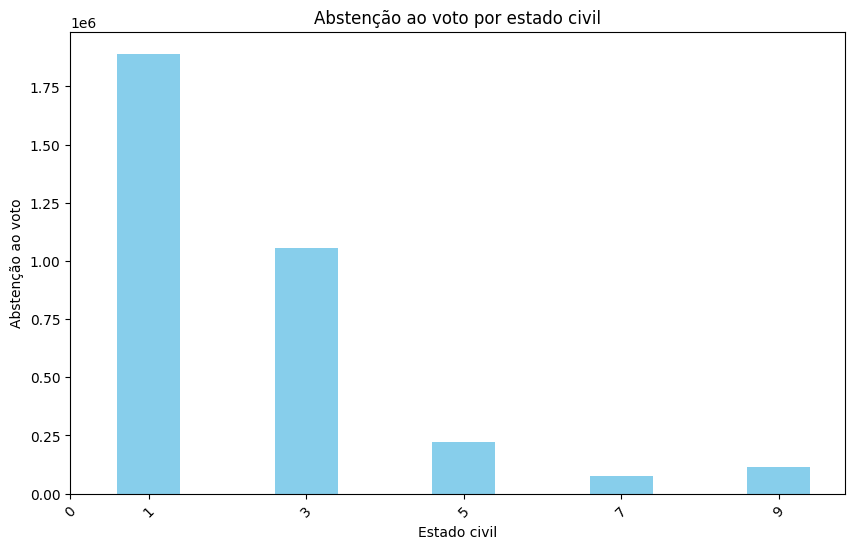

In [11]:
df_2022_agrupado = df_2022_nv.groupby('CD_ESTADO_CIVIL')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_ESTADO_CIVIL'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)

# Exibindo o gráfico
plt.show()

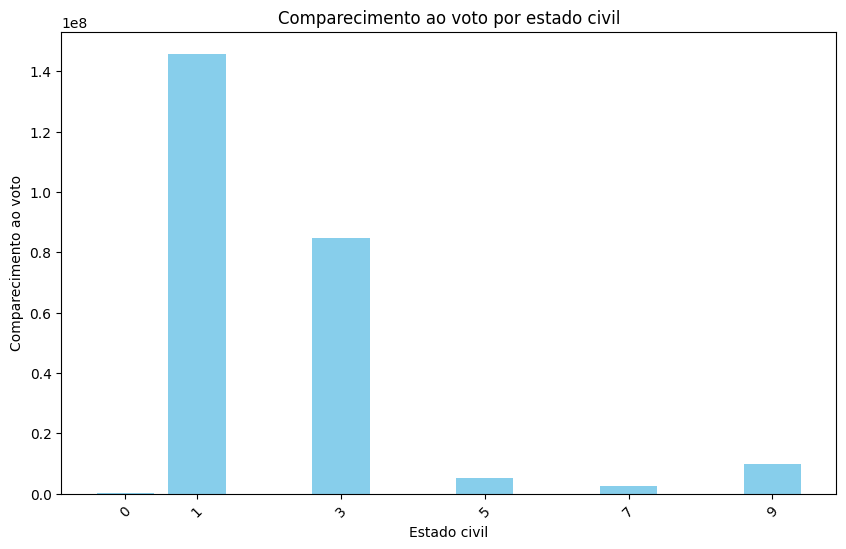

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_ESTADO_CIVIL')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_ESTADO_CIVIL'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)
# Exibindo o gráfico
plt.show()

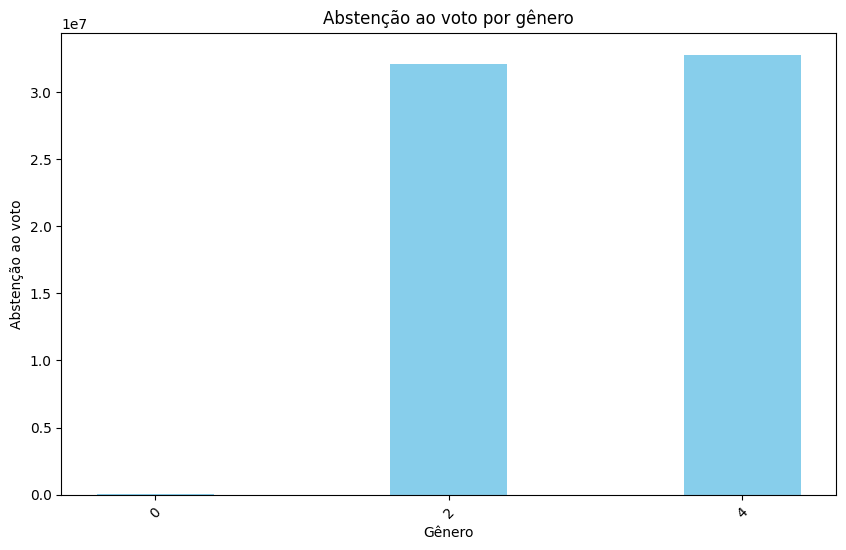

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_GENERO')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GENERO'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)
# Exibindo o gráfico
plt.show()

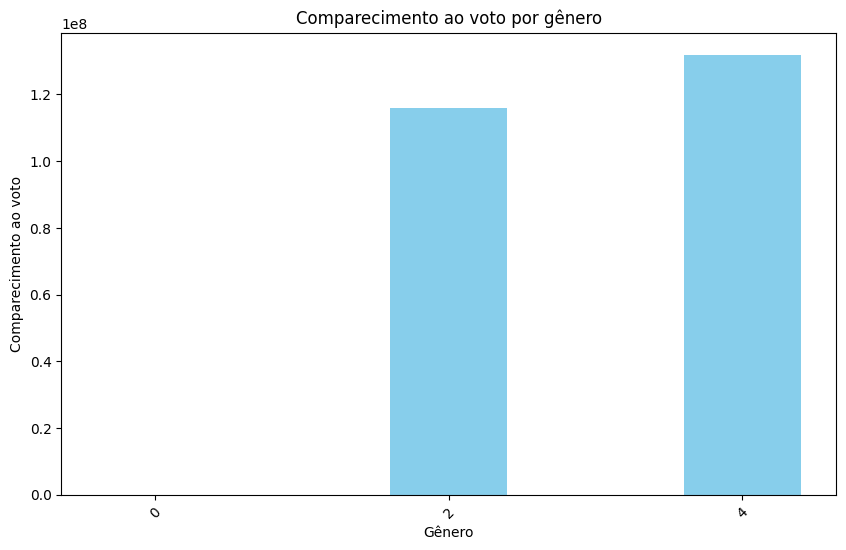

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_GENERO')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GENERO'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)
# Exibindo o gráfico
plt.show()

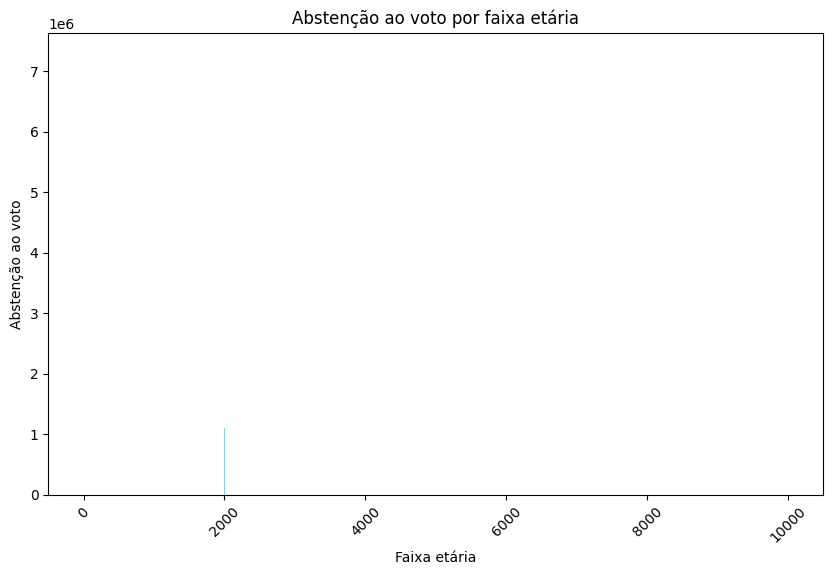

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_FAIXA_ETARIA'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

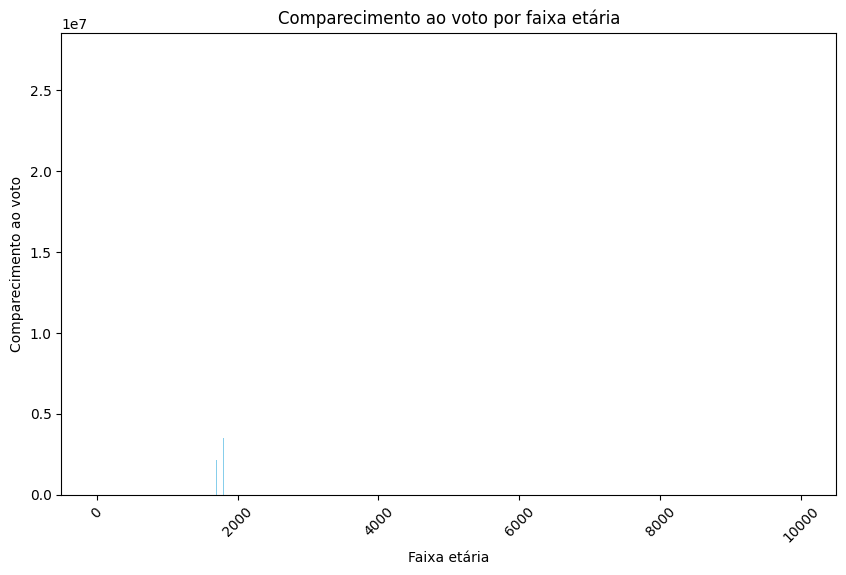

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_FAIXA_ETARIA'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

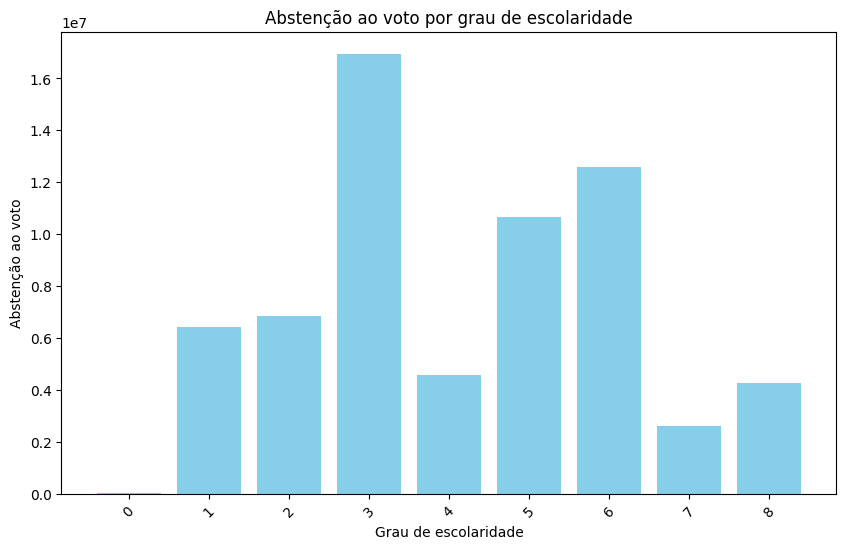

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_GRAU_ESCOLARIDADE')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GRAU_ESCOLARIDADE'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)
# Exibindo o gráfico
plt.show()

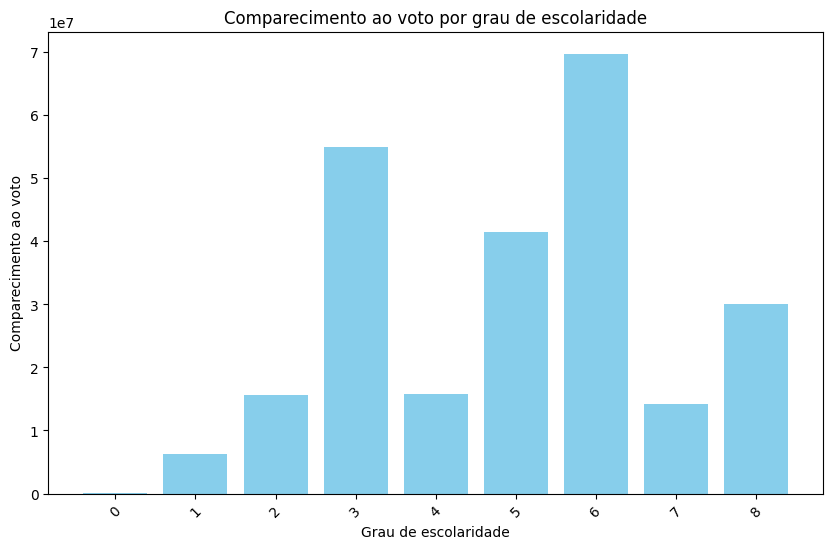

In [ ]:
df_2022_agrupado = df_2022_nv.groupby('CD_GRAU_ESCOLARIDADE')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GRAU_ESCOLARIDADE'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)
# Exibindo o gráfico
plt.show()